In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # для построения интерактивных графиков

%matplotlib inline

In [15]:
# font_scale - изменяем размер шрифта, style - общая тема графика, figsize -размер графика
# настройки seaborn накатываются на графики pandas, т.к. seaborn - по сути это надстройка pandas
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize': (20, 7)}
)

In [26]:
# проанализируем данные о продажах
# для начала прочитаем нужные нам файлы с данными для работы
sales_team  = pd.read_csv('sales_team.csv')
order_leads = pd.read_csv('order_leads.csv')

In [27]:
sales_team.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [29]:
order_leads.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


In [28]:
order_leads.dtypes

Order Id        object
Company Id      object
Company Name    object
Date            object
Order Value      int64
Converted        int64
dtype: object

In [30]:
# видим, что у нас даты в формате строк - переведем их в даты
order_leads.Date = pd.to_datetime(order_leads.Date)

In [31]:
# приведем названия столбцов к удобному виду
order_leads = order_leads.rename(columns={c: c.replace(' ', '_') for c in order_leads.columns})
sales_team = sales_team.rename(columns={c: c.replace(' ', '_') for c in sales_team.columns})

In [32]:
# outer - берем все данные и из левого и из правого датафреймов
# left - присоединяем к левому датафрейму все подходящие данные из правого датафрейма
order_leads_with_team_data = order_leads.merge(sales_team, how='outer', on=['Company_Name', 'Company_Id'])
order_leads_with_team_data.head()

,Order_Id,Company_Id,Company_Name,Date,Order_Value,Converted,Sales_Rep,Sales_Rep_Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [33]:
# найдем департамент, который лучше всего показал себя в продажах
# группируем по департаментам
# и находим лучшую конверсию через mean (среднее (mean) Converted по дням будет равно sum / count)
all_sales = order_leads_with_team_data.groupby(['Sales_Rep'], as_index=False) \
    .agg({'Converted': 'mean'}) \
    .sort_values('Converted')
top_sales = all_sales.tail(10)
top_sales.head()

,Sales_Rep,Converted
346,Nick Allen,0.298507
192,Jennifer Peck,0.304348
468,Thomas Lindsey,0.304348
187,Jason Miller,0.307692
455,Teddy Cook,0.315789


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


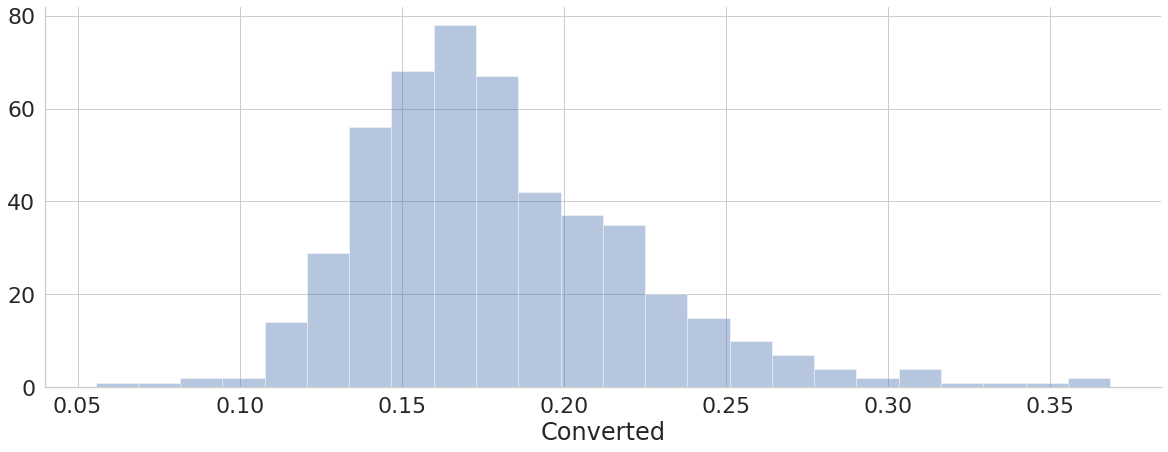

In [34]:
# построим распределение данных в целом
sns.distplot(all_sales.Converted, kde=False)

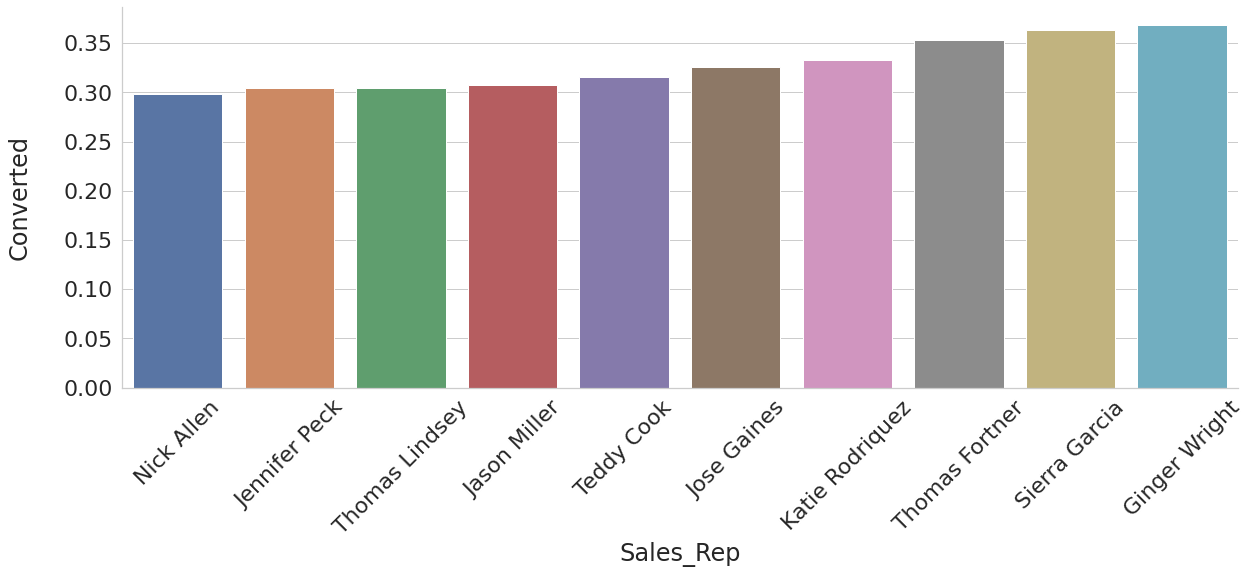

In [35]:
# Визуализация по менеджерам
ax = sns.barplot(data=top_sales, y='Converted', x='Sales_Rep')
ax.set_xticklabels(top_sales.Sales_Rep, rotation=45) # rotation=45 - разворачиваем названия на 45 градусов
ax.set_ylabel('Converted\n')
sns.despine()

In [36]:
# График CR (процента реализованных сделок) по дням
# т.к. converted у нас принимает значения 0 и 1, то
# среднее (mean) Converted по дням будет равно sum / count
# что и является нашим искомым CR
cr_by_day = order_leads.groupby(['Date']) \
    .agg({'Converted': 'mean'}) \
    .rename(columns={'Converted': 'CR'}) \
    .sort_values('Date')

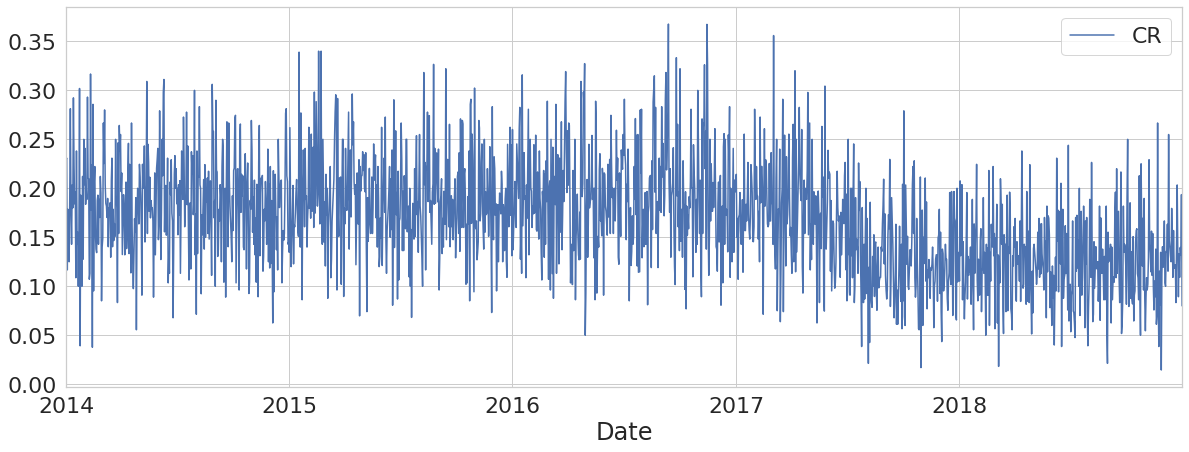

In [37]:
# сырой график
cr_by_day.plot()

In [38]:
# rolling - скользящее, 30 - окно с которым скользим 
# mean - среднее, получаем скользящее среднее
# т.е. берем 30 элементов, считаем по ним среднее, шаг 1, еще 30 элементов, 
# снова среднее, шаг и так до конца выборки, в конце строим график по полученным усредненным значениям

cr_by_day_rolling = cr_by_day.rolling(30).mean()

In [39]:
# видим, что мы теряем часть данных (первые 29) из-за сглаживания
cr_by_day_rolling.head()

,CR
Date,
2014-01-01,NaN
2014-01-02,NaN
2014-01-03,NaN
2014-01-04,NaN
2014-01-05,NaN


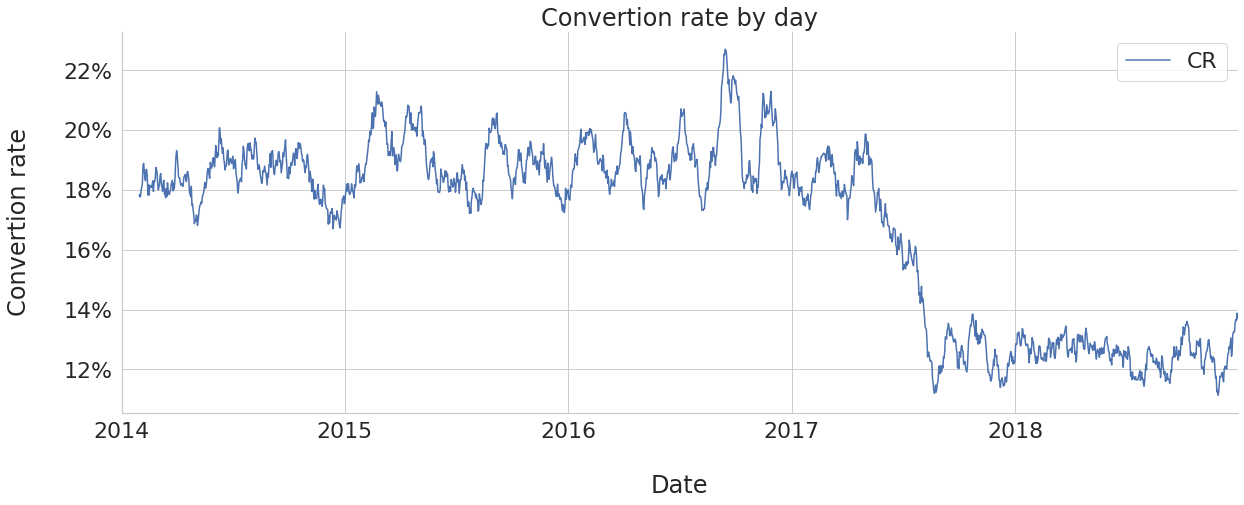

In [40]:
# так как мы сохранили график в переменную ax - мы теперь можем с ним проводить какие-либо действия

ax = cr_by_day_rolling.plot()
ax.set_title('Convertion rate by day') # добавим название графика сверху
ax.set_ylabel('Convertion rate\n') # установим подпись по оси Y
ax.set_xlabel('\nDate') # \n работает как и в тексте - сделает отступ

# можно заменить подписи данных на оси - в данном случае переводим в проценты
ax.set_yticklabels([f'{format(x * 100, ".0f")}%' for x in ax.get_yticks()]) 

# чтобы убрать лишние аутпуты
sns.despine()

In [41]:
# вообще построение графика можно упаковать в функцию
def get_plot(df, x_lab='', y_lab='', title=''):
    ax = df.plot()
    ax.set_title(title)
    ax.set_ylabel(f'{y_lab}\n')
    ax.set_xlabel(f'\n{x_lab}')
    ax.set_yticklabels([f'{format(x * 100, ".0f")}%' for x in ax.get_yticks()]) 
    sns.despine()

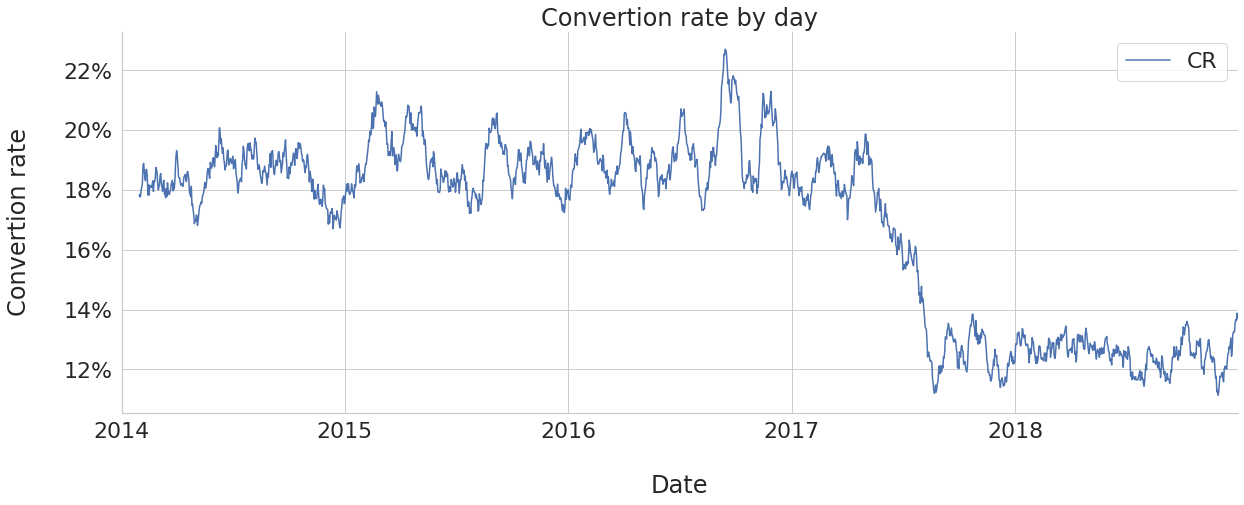

In [42]:
# тестируем функцию
get_plot(cr_by_day_rolling, title='Convertion rate by day', x_lab='Date', y_lab='Convertion rate')

In [78]:
# интерактивный график через plotly

In [43]:
cr_by_day_rolling_2 = cr_by_day_rolling.reset_index().dropna()

In [44]:
cr_by_day_rolling_2.head()

,Date,CR
29,2014-01-30,0.178512
30,2014-01-31,0.177663
31,2014-02-01,0.177996
32,2014-02-02,0.180229
33,2014-02-03,0.180944


In [46]:
# получим график аналогичный тому, что мы строили через sns, но интерактивный!
fig = px.line(cr_by_day_rolling_2, x='Date', y='CR')
fig.show()